# CASE STUDY -  CHURN MODELLING


### STEP 1 : PROBELM STATEMENT


 - In this problem we will be analyzing churn rate i.e. We will be building ANN that will help us to know as to why the customers are leaving the bank.

 
 
 - This is a classification problem where we have dependent variable `exited` which has 2 values 0 and 1 
     - 1 - Customer Leaves 
     - 0 - Customer Stays
     
     
 - We have 10000 records of observation.
 
 
 - We have following features which will act as an independent variable or neurons for our ANN:
    - credit score
    - geography 
    - age 
    - tenure 
    - balance 
    - nos of products (saving, current, fixed etc)
    - credit card (1-Yes, 0-NO)
    - estimated salary


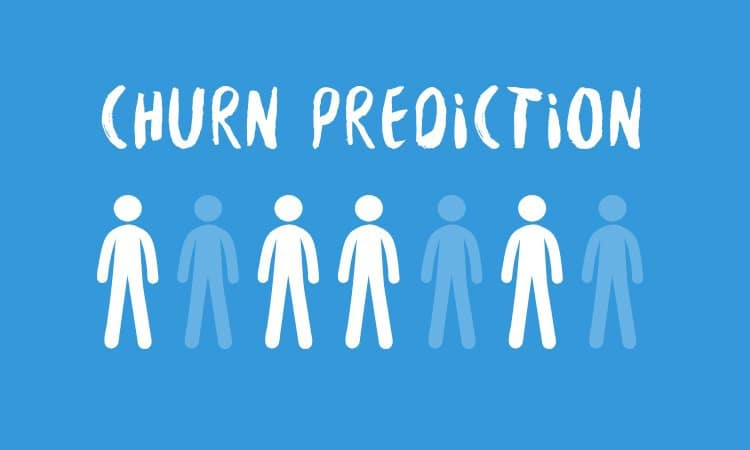

### STEP 2  - IMPORTING LIBRARIES

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### STEP 3 - IMPORTING DATASET 

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
print('Dataset Imported Successfully')

Dataset Imported Successfully


### STEP 4 - EXPLORATORY DATA ANALYSIS (EDA) / DATA PREPROCESSING / DATA WRAGLING

In [3]:
# Size of the data.

df.shape

(10000, 14)

In [4]:
# Checking columns

df.keys()

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
# Checking top 5 records

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# Dropping unwanted columns - Row Number, Customer ID, Surname 

df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'],
        inplace = True)

df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# Getting Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [8]:
# Checking null values 

df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
# Getting Summary 

df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
# Checking Categorical Values

categorical_val = []
continous_val   = []

for column in df.columns:
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [11]:
categorical_val

['Geography',
 'Gender',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'Exited']

In [12]:
continous_val

['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

No need of following things to apply as dataset is already clean.

 - No null values to handle 


 - No columns to be renamed 


- No repositioning of columns to be done.


#### EDA - Categorical Value Visualization 

> Target - `Exited`

Nos of people exiting (1) and non exting (0) from the bank:
0    7963
1    2037
Name: Exited, dtype: int64


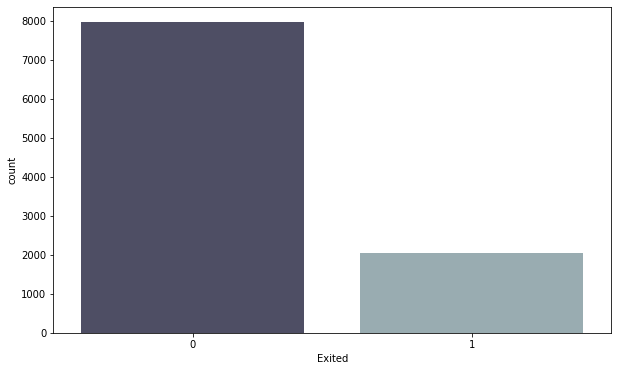

In [13]:
plt.figure(figsize = (10,6))

print("Nos of people exiting (1) and non exting (0) from the bank:")
print(df.Exited.value_counts())

sns.countplot(x = 'Exited',
              data = df,
              palette = 'bone')

plt.show()

From the above graph we can see that there are more number of observation recorded for the people not exiting the bank.

> > `Geography` vs `Target`

Nos of people residing in France   : 5014
Nos of people residing in Spain    : 2509
Nos of people residing inn Germany : 2477


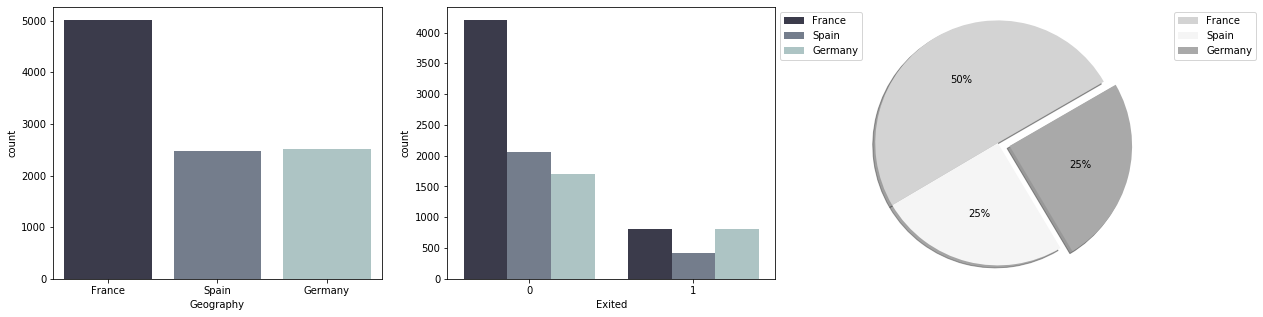

In [14]:
plt.figure(figsize = (20,5))

France, Spain, Germany = df.Geography.value_counts()
print("Nos of people residing in France   :", France)
print("Nos of people residing in Spain    :", Spain)
print("Nos of people residing inn Germany :", Germany)

plt.subplot(1,3,1)
sns.countplot(x = 'Geography',
              data = df,
              palette = 'bone')

plt.subplot(1,3,2)
sns.countplot(x = 'Exited',
              data = df,
              palette = 'bone',
              hue = 'Geography')
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))

plt.subplot(1,3,3)
labels  = ['France','Spain','Germany']
size = df['Geography'].value_counts(), 
colors = ['lightgrey', 'whitesmoke', 'darkgrey']
explode = [0, 0, 0.1]
plt.pie(size, explode, shadow=True, autopct='%1.f%%', colors=colors, startangle=30)
plt.axis('equal')
plt.legend(labels, loc='upper left', bbox_to_anchor = (1,1))

plt.show()

 - From the above visualization we can say that people residing in France contribute 50% of our dataset and rest residing in Spain and Germany each contribute 25%. 
 
 
 - Also when the geography locations are compared with the target we see that people residing in France are more likely to stay. 
 
 
 -  France and Germany have almost equal nos of counts leaving the bank where as Spain seems to be half of France of Germany.

> > `Gender` vs `Target`

Nos of Males   : 5457
Nos of Females : 4543


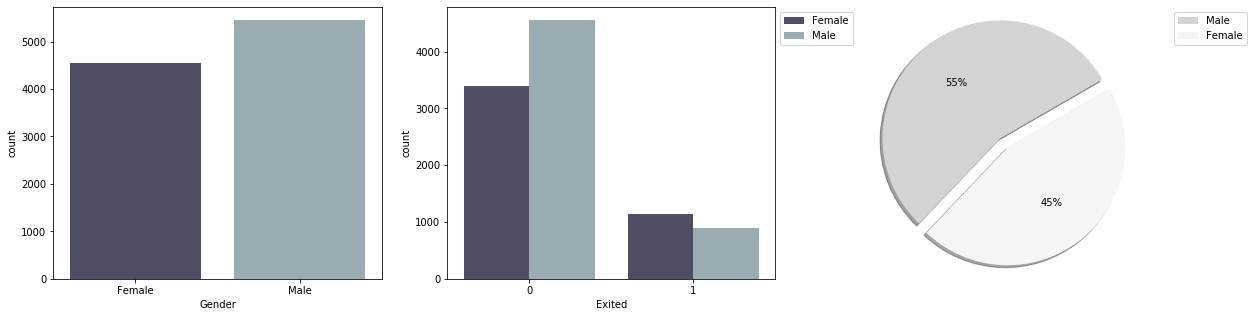

In [15]:
plt.figure(figsize = (20,5))

Male, Female = df.Gender.value_counts()
print("Nos of Males   :", Male)
print("Nos of Females :", Female)

plt.subplot(1,3,1)
sns.countplot(x = 'Gender',
              data = df,
              palette = 'bone')

plt.subplot(1,3,2)
sns.countplot(x = 'Exited',
              data = df,
              palette = 'bone',
              hue = 'Gender')
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))

plt.subplot(1,3,3)
labels  = ['Male','Female']
size = df['Gender'].value_counts(), 
colors = ['lightgrey', 'whitesmoke']
explode = [0, 0.1]
plt.pie(size, explode, shadow=True, autopct='%1.f%%', colors=colors, startangle=30)
plt.axis('equal')
plt.legend(labels, loc='upper left', bbox_to_anchor = (1,1))

plt.show()

- From the above observation we can see that Male contribute 55% and Female contribute 45% of our dataset.


-  Also when compared with target variable we see that more number of Males(approx.4500) stay in the bank when compared with Females(approx 3500)


- There are very less number of females and males exiting from the bank but we see that females outnumbered males by very few values.

> > `Num Of Products` vs `Target`

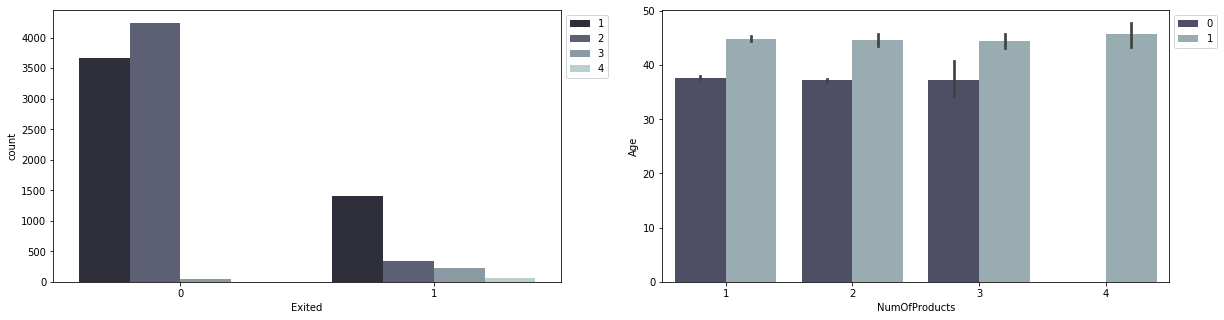

In [16]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.countplot(x = 'Exited',
              data = df,
              palette = 'bone',
              hue = 'NumOfProducts')
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))

plt.subplot(1,2,2)
sns.barplot(x = 'NumOfProducts',
            y = 'Age',
            data = df,
            hue = 'Exited', 
            palette ='bone')
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))

-  From above visualization we can see that persons who are staying with bank, none of them purchased product which belongs to category 4.


- Most of the users are attracted towards the product which belongs to category 2.

 Q) How many males and females are there who did not purchased product 4 and are staying ?

In [17]:
print(df.Exited[(df.Gender == 'Male') & (df.NumOfProducts == 4) & (df.Exited == 0)].value_counts())
print(df.Exited[(df.Gender == 'Female') & (df.NumOfProducts == 4) & (df.Exited == 0)].value_counts())

Series([], Name: Exited, dtype: int64)
Series([], Name: Exited, dtype: int64)


In [18]:
print(df.Exited[(df.Gender == 'Male') & (df.NumOfProducts == 4) & (df.Exited == 1)].value_counts())
print(df.Exited[(df.Gender == 'Female') & (df.NumOfProducts == 4) & (df.Exited == 1)].value_counts())

1    22
Name: Exited, dtype: int64
1    38
Name: Exited, dtype: int64


 > > `Credict Card` vs `Target`

In [19]:
df.HasCrCard.value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

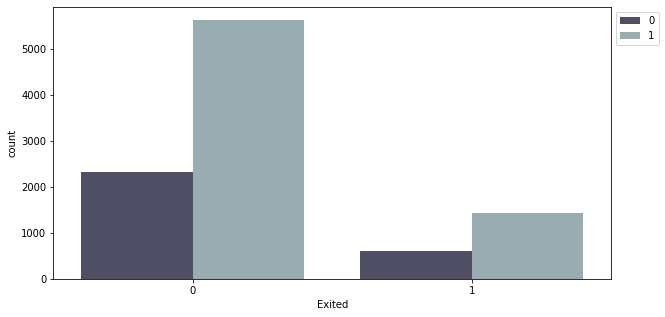

In [20]:
plt.figure(figsize = (10,5))

sns.countplot(x = 'Exited',
              data = df,
              palette = 'bone',
              hue = 'HasCrCard')

plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))

In [21]:
df.Exited[(df.HasCrCard == 0) & (df.Exited == 0)].value_counts()

0    2332
Name: Exited, dtype: int64

In [22]:
df.Exited[(df.HasCrCard == 0) & (df.Exited == 1)].value_counts()

1    613
Name: Exited, dtype: int64

>  From the above visualization we can see that approx 80 % of the people (2332/2945) those who do not opt for credit card stay with the bank and only 20 % (613/2946) backout from the services.

Q) How many observations are to be seen as positive - `exited = 1` where user had credit card and was active / not active?

In [23]:
df.Exited[(df.HasCrCard == 1) & (df.IsActiveMember == 1) & (df.Exited == 1)].value_counts()

1    482
Name: Exited, dtype: int64

In [24]:
df.Exited[(df.HasCrCard == 1) & (df.IsActiveMember == 0) & (df.Exited == 1)].value_counts()

1    942
Name: Exited, dtype: int64

> > `Active Member` vs `Target`

In [25]:
df.IsActiveMember.value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

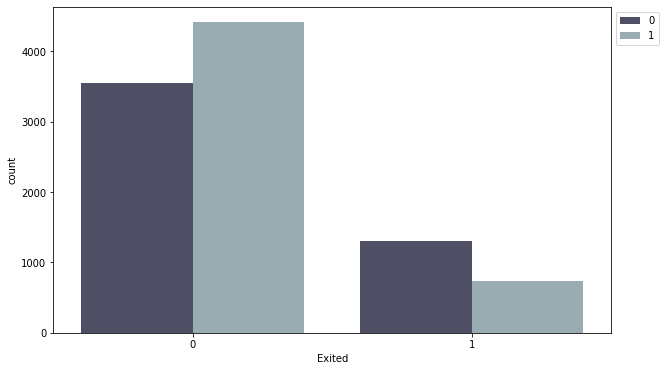

In [26]:
plt.figure(figsize=(10,6))

sns.countplot(x = 'Exited', 
              data = df,
              palette = 'bone',
              hue = 'IsActiveMember')

plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))

In [27]:
df.Exited[(df.IsActiveMember == 0) & (df.Exited == 0)].value_counts()

0    3547
Name: Exited, dtype: int64

In [28]:
df.Exited[(df.IsActiveMember == 1) & (df.Exited == 1)].value_counts()

1    735
Name: Exited, dtype: int64

- From the above visualization we can see that out of 4849 observations being inactive 70 % stayed with the bank and rest of the 30 % exited from the service. Also our prime focus should be those 70 % people being inactive and staying with the bank.


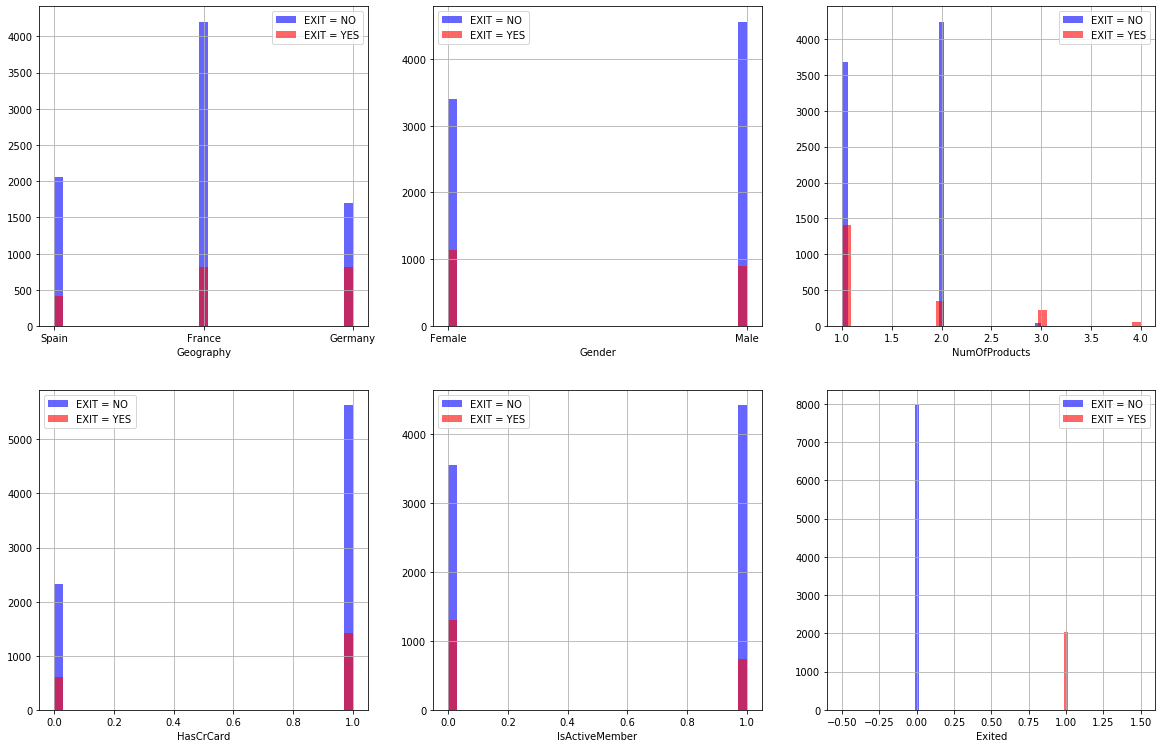

In [29]:
# Representing all categorical values vs target together.

plt.figure(figsize=(20, 20))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["Exited"] == 0][column].hist(bins=35, color='blue', label='EXIT = NO',  alpha=0.6)
    df[df["Exited"] == 1][column].hist(bins=35, color='red',  label='EXIT = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

plt.show()

#### EDA - Continous Value Visualization

> > `AGE`

In [30]:
#5 point summary

df['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

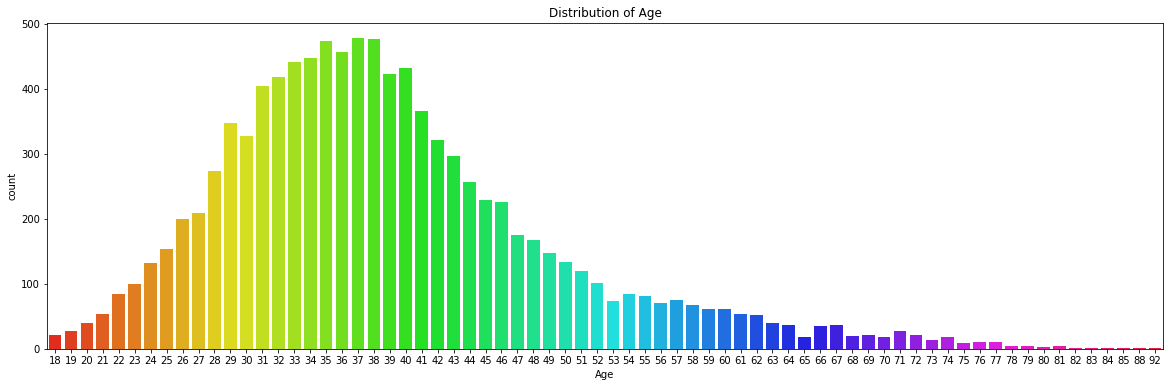

In [31]:
plt.figure (figsize = (20,6))

sns.countplot(df['Age'], palette = 'hsv')

plt.title('Distribution of Age')
plt.show()

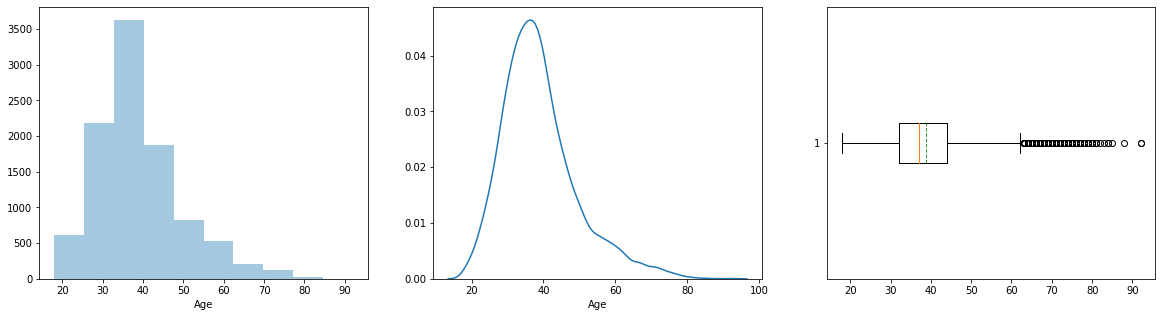

In [32]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.distplot(df['Age'] , kde = False , bins = 10)

plt.subplot(1,3,2)
sns.distplot(df['Age'] , hist = False )

plt.subplot(1,3,3)
plt.boxplot(x = df['Age'],
            vert = False,
            meanline= True,
            showmeans= True)

plt.show()

- Above graphs are conveying the same message but in different way.


- We can see that `age` variable is positively skewed where mean > median. Most of the observation are between 30-50 age group.

> > `Credit Score`

In [33]:
# 5 point summary

df.CreditScore.describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

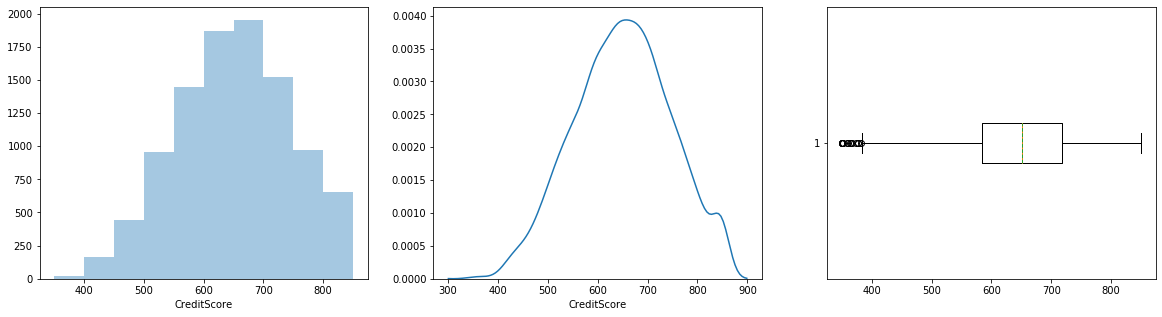

In [34]:
plt.figure(figsize = (20, 5))

plt.subplot(1,3,1)
sns.distplot(df.CreditScore, kde = False, bins = 10)

plt.subplot(1,3,2)
sns.distplot(df.CreditScore, hist = False)

plt.subplot(1,3,3)
plt.boxplot(x = df['CreditScore'],
            vert = False,
            meanline= True,
            showmeans= True)

plt.show()

- Above graphs are conveying the same message but in different way 


- We can see that `credit score` is normally distributed where mean = median. No skewness is observed.


- Most of the observation have credit score between 580 - 720 as seen from 5 point summary and box plot graph.

> > Tenure

In [35]:
# 5 point summary

df.Tenure.describe()

count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64

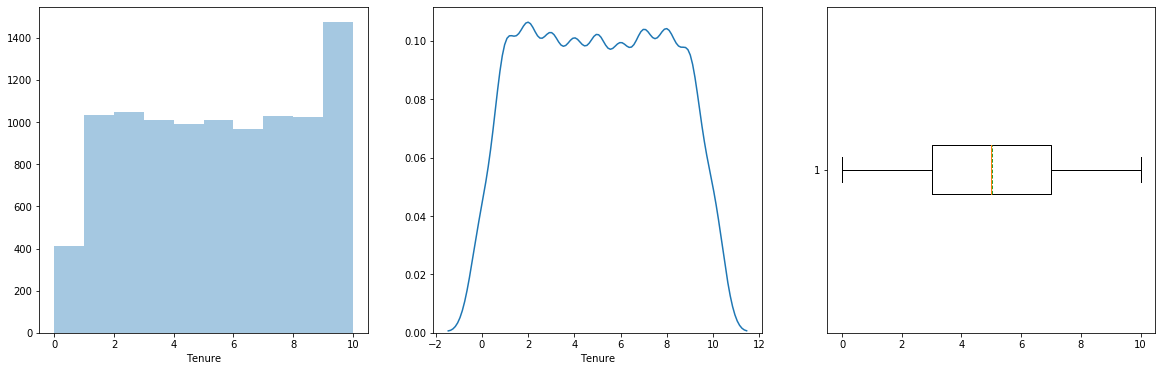

In [36]:
plt.figure(figsize = (20,6))

plt.subplot(1,3,1)
sns.distplot(df.Tenure, kde = False, bins = 10)

plt.subplot(1,3,2)
sns.distplot(df.Tenure, hist = False)

plt.subplot(1,3,3)
plt.boxplot(x = df['Tenure'],
            vert = False,
            meanline= True,
            showmeans= True)

plt.show()

 - Above graphs are conveying the message in same way but in different manner.
 
 
 - We can see that `Tenure` is normally distributed and no outliers are observerd as the unique values are within the range.
 

> > `Balance`

In [37]:
# 5 point summary

df['Balance'].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

In [38]:
df.Balance[(df['Balance'] == 0)].value_counts()

0.0    3617
Name: Balance, dtype: int64

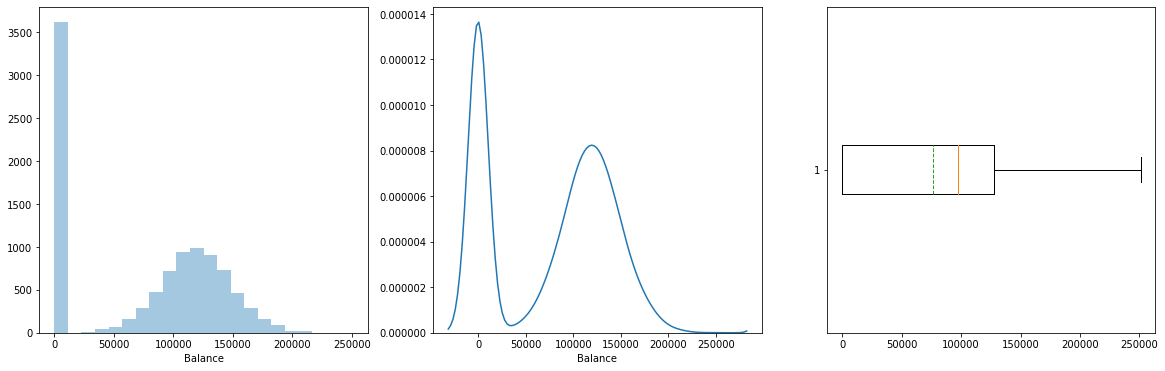

In [39]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
sns.distplot(df['Balance'], kde = False, hist=10)

plt.subplot(1,3,2)
sns.distplot(df['Balance'], hist = False)

plt.subplot(1,3,3)
plt.boxplot(x = df['Balance'],
            vert= False,
            meanline= True,
            showmeans= True)

plt.show()

- Above graphs are conveying the message in same way but in different manner.


- From the box plot we can clearly see that `Balance` attribute is left skewed (negative) where mean < median

In [40]:
continous_val

['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

> > `Estimated Salary`

In [41]:
# 5 point summary

df['EstimatedSalary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

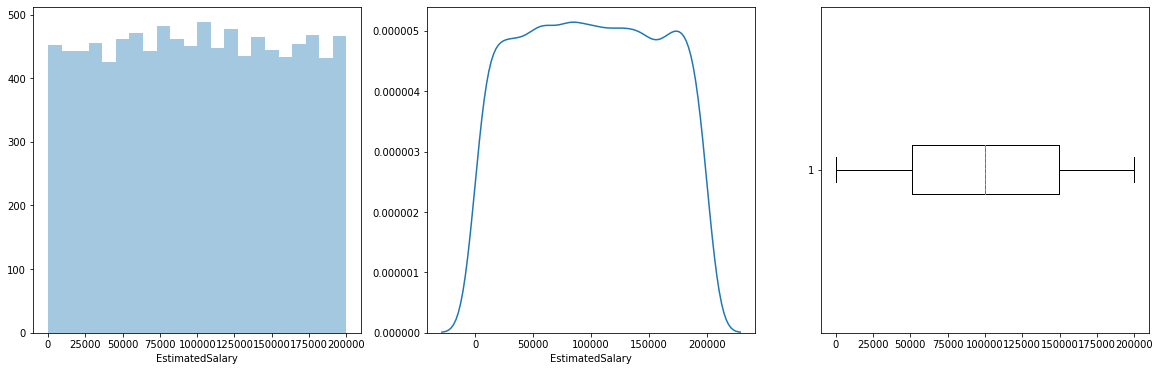

In [42]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
sns.distplot(df['EstimatedSalary'], kde = False, hist=10)

plt.subplot(1,3,2)
sns.distplot(df['EstimatedSalary'], hist = False)

plt.subplot(1,3,3)
plt.boxplot(x = df['EstimatedSalary'],
            vert= False,
            meanline= True,
            showmeans= True)

plt.show()

- Above graphs are conveying the same message but in differnet way.


- We can see that `Salary` attribute is normally distributed and no outliers are detected.

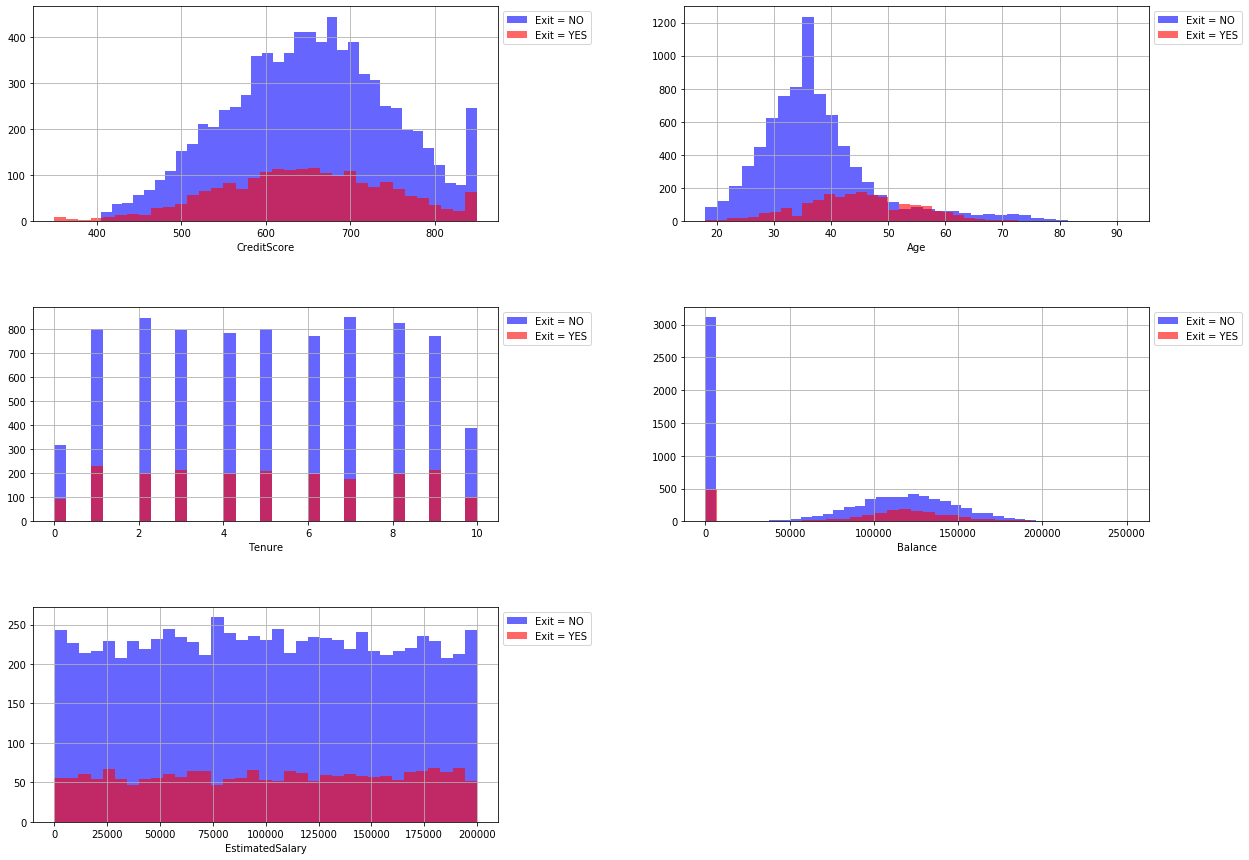

In [43]:
# Representing all continous values with target variable.

plt.figure(figsize=(20, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    plt.subplots_adjust(wspace = 0.4, hspace= 0.4)
    df[df["Exited"] == 0][column].hist(bins=35, color='blue', label='Exit = NO', alpha=0.6)
    df[df["Exited"] == 1][column].hist(bins=35, color='red',  label='Exit = YES', alpha=0.6)
    plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
    plt.xlabel(column)

plt.show()

- From the above visualizations we can see that irrespective of what value they have for various continous variables in our dataset most of the people stay with the bank and very few people leave the bank.

In [44]:
continous_val

['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

#### Age Group Visualization

Nos of customers based on Age-Group 

Nos of customers between 18-30    : 1968
Nos of customers between 31-60    : 7568
Nos of customers between 60_above : 464


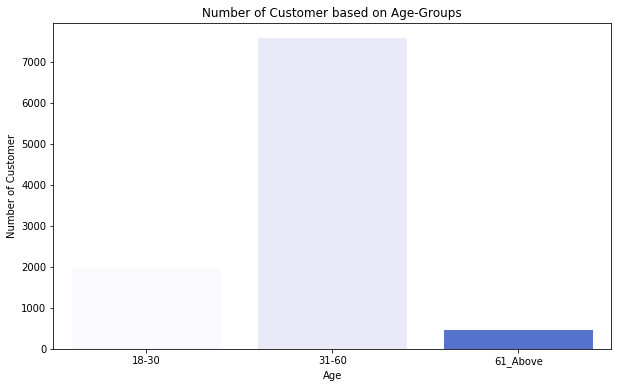

In [45]:
age18_30    = df.Age[(df.Age <= 30) & (df.Age >= 18)]
age31_60    = df.Age[(df.Age <= 60) & (df.Age >= 31)]
age61_above = df.Age[(df.Age >= 61)]

print('Nos of customers based on Age-Group \n')
print('Nos of customers between 18-30    :', age18_30.value_counts().sum())
print('Nos of customers between 31-60    :', age31_60.value_counts().sum())
print('Nos of customers between 60_above :', age61_above.value_counts().sum())

X = ["18-30", "31-60", "61_Above"]
y = [len(age18_30.values), len(age31_60.values), len(age61_above.values)]

plt.figure(figsize=(10,6))
sns.barplot(x=X, 
            y=y, 
            palette=['ghostwhite','lavender','royalblue'])
plt.title("Number of Customer based on Age-Groups")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

In [46]:
age18_30    = df[(df.Age <= 30) & (df.Age >= 18)]
age31_60    = df[(df.Age <= 60) & (df.Age >= 31)]
age61_above = df[(df.Age >= 61)]

> > `Exited`

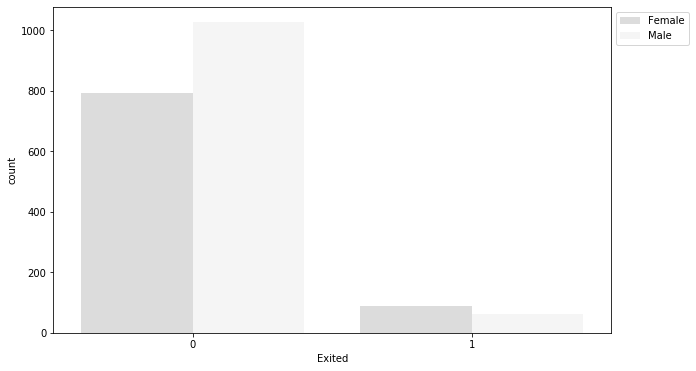

In [47]:
# Age Group between 18-30 

plt.figure(figsize = (10,6))
sns.countplot(x = 'Exited', 
              data = age18_30,
              palette=["gainsboro", "whitesmoke"],
              hue = 'Gender')
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.show()

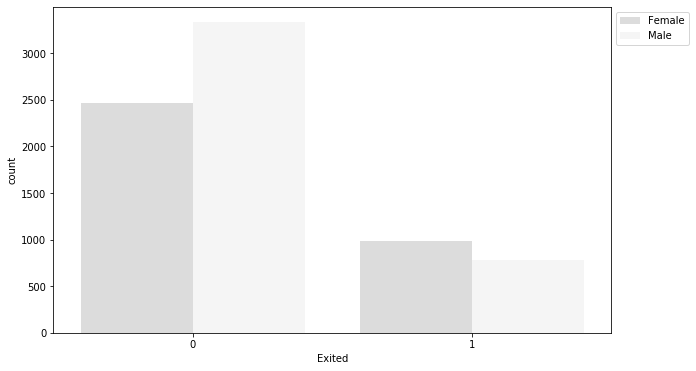

In [48]:
# Age Group between 31-60 

plt.figure(figsize = (10,6))
sns.countplot(x = 'Exited', 
              data = age31_60,
              palette=["gainsboro", "whitesmoke"],
              hue = 'Gender')
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.show()

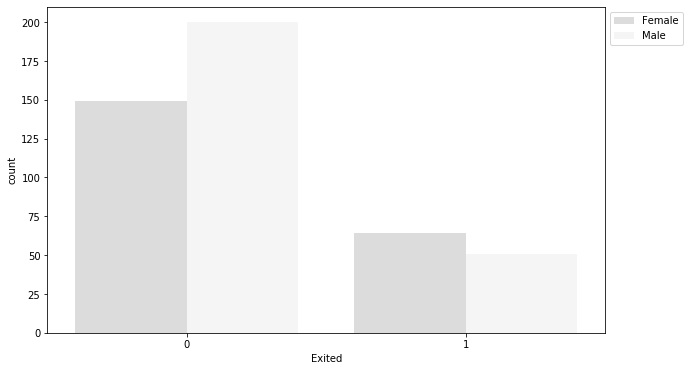

In [49]:
# Age Group between 60 & above 

plt.figure(figsize = (10,6))
sns.countplot(x = 'Exited', 
              data = age61_above,
              palette=["gainsboro", "whitesmoke"],
              hue = 'Gender')
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.show()

 - From all the graphs related to `Age-Group` vs `Exited` above we can comment that.
 
     - There are more people belonging to age group between 31-60 hence we had obtained right skewed graph.
     - Most of people stay with bank as seen from the above age-group visualization.
     - `Exited = 0` - Males > Womens
     - `Exited = 1` - Males < Womens

#### Encoding Categorical Data 

In [50]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [51]:
#Splitting data into Independednt & Dependent

X = df.iloc[:, 0:10].values
y = df.iloc[:, -1].values

In [52]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [53]:
# Using Label Encoder to encode the gender feature.

from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X[:, 2] = labelencoder_X.fit_transform(X[:, 2])

In [54]:
#Using Label Encoder + One Hot Encoder to encode the geography feature.

from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X[:, 1] = labelencoder_X.fit_transform(X[:, 1])

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import  ColumnTransformer
ct = ColumnTransformer([("Geography", OneHotEncoder(), [1])], remainder = 'passthrough')
X = ct.fit_transform(X).astype(int)

In [55]:
print(X)

[[     1      0      0 ...      1      1 101348]
 [     0      0      1 ...      0      1 112542]
 [     1      0      0 ...      1      0 113931]
 ...
 [     1      0      0 ...      0      1  42085]
 [     0      1      0 ...      1      0  92888]
 [     1      0      0 ...      1      0  38190]]


In [56]:
type(X)

numpy.ndarray

In [57]:
# Avoiding dummy variable trap

X = X[:, 1:]
print(X)

[[     0      0    619 ...      1      1 101348]
 [     0      1    608 ...      0      1 112542]
 [     0      0    502 ...      1      0 113931]
 ...
 [     0      0    709 ...      0      1  42085]
 [     1      0    772 ...      1      0  92888]
 [     0      0    792 ...      1      0  38190]]


#### Splitting Data  - Training & Test 

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### Feature Scaling

In [59]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### STEP 5 - FEATURE SELECTION / DIMENSIONALITY REDUCTION / MULTICOLLINEARITY

#### Heat Map

(9.0, 0.0)

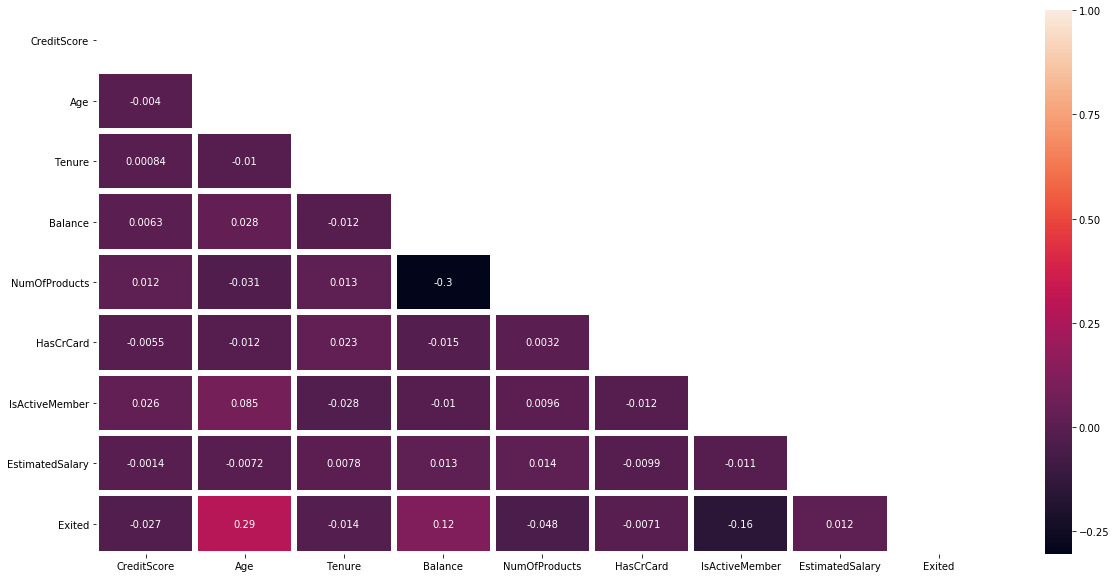

In [60]:
plt.figure(figsize=(20,10))
matrix = np.triu(df.corr())
ax = sns.heatmap(data=df.corr(), linewidths=5, annot=True, mask=matrix)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

 - From the above observation we can see that non of the independent features are highly co-related with eachother.
 
 
 - All the features can help us to predict the value of dependent variable that whether or not they will be staying in the bank or opting out from the service.

### STEP 6  - MODEL BUILDING 

#### Building Artificial Neural Network 

In [61]:
import tensorflow as tf

>  `STEP 1` : Initialization 

We will create a variable called artifical neural network itself. this variable will be created as an object of certain class and that certain class is the `Sequential Class` which allow us to build the artificial neural network as a sequence of layers and it is taken from models modules which belongs to keras library and indeed it belongs to tensorflow.

In [62]:
ann = tf.keras.models.Sequential()

> `STEP 2` : Adding input layer & hidden layer (Shallow Neural Network)

Here we will be using the `Dense Class` to add the input layer and hidden layer. We would be using artificial neural object i.e. ann of Sequential Class from which we will call one of the method `add` which will be acting as an instance of another class called `Dense Class`. It helps to add fully connected layers and automatically adds input layers neurons.

In [63]:
ann.add(tf.keras.layers.Dense(units = 6, activation='relu'))

> `STEP 3` : Adding second hidden layer

Here we will be using, same command which we used for adding input layers and hidden layter. 

In [64]:
ann.add(tf.keras.layers.Dense(units = 6, activation='relu'))

> `STEP 4` : Adding output layer

We are using `units` = 1 since it is binary classifier and activation function as `sigmoid` since we can predict the probabilities of the customers leaving or staying with the bank.

In [65]:
ann.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

#### Training Artificial Neural Network

> `STEP 1`: Compiling ANN

We would be using same artificial neural object and this time we will be calling a new method - `compile` which will take 3 parameters.

- `optimizer` = adam (Most commonly used as it can performs Stochastic Gradient Descent which will update the weights and reduce your loss error between predicted and actual result)


- `loss` =  binary_crossentrophy or categorical_crossentrophy (depending upon our output neuron)


- `metrics` = It accepts value as a list and is use to evaluate the performance of the model. We will choose most used one i.e. accuracy 

In [66]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy' , metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


> `STEP 2` : Training ANN with Data 

We will be using same artificial neural object and this time we will be calling a new method - `fit` which will take following parameters.

  - `X_train & y_train` = data needed for training our ANN
  
  
  - `batch_size` = batch learning is indeed more efficient and performant when training the artifical neural network.
  
  
  - `epochs` = neural network is trained on certain amount of epochs to improve the accuracy over the time. 

In [67]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
8000/8000 [==============================] - 1s 83us/sample - loss: 0.6282 - acc: 0.6988
Epoch 2/100
8000/8000 [==============================] - 0s 41us/sample - loss: 0.4889 - acc: 0.7966
Epoch 3/100
8000/8000 [==============================] - 1s 71us/sample - loss: 0.4521 - acc: 0.8014
Epoch 4/100
8000/8000 [==============================] - 1s 66us/sample - loss: 0.4377 - acc: 0.8029
Epoch 5/100
8000/8000 [==============================] - 1s 67us/sample - loss: 0.4309 - acc: 0.8046
Epoch 6/100
8000/8000 [==============================] - 1s 65us/sample - loss: 0.4267 - acc: 0.8071
Epoch 7/100
8000/8000 [==============================] - 1s 68us/sample - loss: 0.4233 - acc: 0.8096
Epoch 8/100
8000/8000 [==============================] - 1s 66us/sample - loss: 0.4198 - acc: 0.8133
Epoch 9/100
8000/8000 [==============================] - 1s 65us/sample - loss: 0.4147 - acc: 0.8165
Epoch 10/100
8000/8000 [===================

### STEP 7 - MODEL EVALUATION

#### Test


Use ANN model to predict if customer will leave or stay with the bank.

- Geography = France

- Credit Score = 600

- Gender = Male

- Age = 60

- Tenure = 3 years

- Balance = $ 600000

- Nos of Products = 2

- Credit Card = Yes

- Active Member = Yes

- Estimated Salary =  $ 500000

So should we say goodbye to that customer ?

In [68]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [69]:
X

array([[     0,      0,    619, ...,      1,      1, 101348],
       [     0,      1,    608, ...,      0,      1, 112542],
       [     0,      0,    502, ...,      1,      0, 113931],
       ...,
       [     0,      0,    709, ...,      0,      1,  42085],
       [     1,      0,    772, ...,      1,      0,  92888],
       [     0,      0,    792, ...,      1,      0,  38190]])

In [70]:
# Predicting Class 

print(ann.predict(sc_X.transform([[0, 0, 600, 1, 60, 3, 60000, 2, 1, 1, 50000]])))

[[0.08698092]]


**Note** : Values of the features where all encoded in double square bracket as `predict` method always accepts the input as a 2-D array. Also we have scaled our values which needs to be predicted as our ANN was trianed on scaled values. Output received tells us the probability of the customer staying or leaving the bank since we had used `sigmoid` activation function.

#### Predicting Test Result

In [71]:
y_pred = ann.predict(X_test)
y_pred = y_pred > 0.5

df_test = pd.DataFrame({
    'Actual Values'    : y_test.flatten(),
    'Predicted Values' : y_pred.flatten().astype(int)
    })

df_test.head()

,Actual Values,Predicted Values
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0


#### Confusion Matrix

(2.0, 0.0)

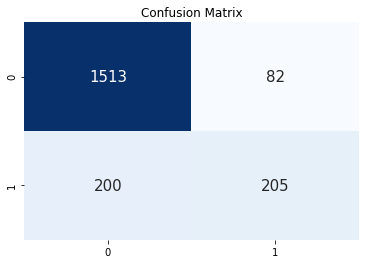

In [72]:
from sklearn.metrics import confusion_matrix
df_cm = confusion_matrix(y_test, y_pred)

plt.title("Confusion Matrix")
ax = sns.heatmap(df_cm,
                 annot=True,
                 cmap="Blues",
                 fmt="d",
                 cbar=False, 
                 annot_kws={"size": 15})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### STEP 8 - MODEL IMPROVEMENT / HYPER PARAMETER TUNING

> `Case 1` - More hidden layers


In [73]:
#Initialize Neural Network
ann1 = tf.keras.models.Sequential()

#Addition of layers
ann1.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann1.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann1.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann1.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

#Addition of Outpur layer
ann1.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

#Compiling ANN
ann1.compile(optimizer = 'adam', loss = 'binary_crossentropy' , metrics = ['accuracy'])

#Fitting training data
ann1.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
8000/8000 [==============================] - 1s 147us/sample - loss: 0.5396 - acc: 0.7960
Epoch 2/100
8000/8000 [==============================] - 1s 76us/sample - loss: 0.4710 - acc: 0.7960
Epoch 3/100
8000/8000 [==============================] - 1s 78us/sample - loss: 0.4495 - acc: 0.7966
Epoch 4/100
8000/8000 [==============================] - 1s 79us/sample - loss: 0.4404 - acc: 0.7975
Epoch 5/100
8000/8000 [==============================] - 1s 78us/sample - loss: 0.4356 - acc: 0.7977
Epoch 6/100
8000/8000 [==============================] - 1s 81us/sample - loss: 0.4333 - acc: 0.7968
Epoch 7/100
8000/8000 [==============================] - 1s 79us/sample - loss: 0.4319 - acc: 0.7990
Epoch 8/100
8000/8000 [==============================] - 1s 78us/sample - loss: 0.4299 - acc: 0.8004
Epoch 9/100
8000/8000 [==============================] - 1s 78us/sample - loss: 0.4288 - acc: 0.8031
Epoch 10/100
8000/8000 [==============================] - 0s 62us/sample - loss: 0.4274 - 

(2.0, 0.0)

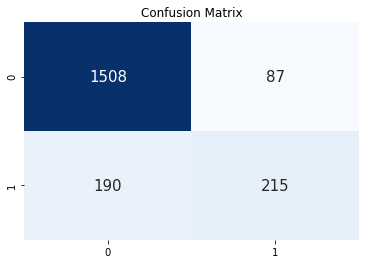

In [74]:
# Predicting Output and Confusion Matrix

y_pred1 = ann1.predict(X_test)
y_pred1 = (y_pred1 > 0.5)

from sklearn.metrics import confusion_matrix
df_cm1 = confusion_matrix(y_test, y_pred1)

plt.title("Confusion Matrix")
ax = sns.heatmap(df_cm1,
                 annot=True,
                 cmap="Blues",
                 fmt="d",
                 cbar=False, 
                 annot_kws={"size": 15})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

> `Case 2` - More hidden layer + More batch size 

In [75]:
#Initialize Neural Network
ann2 = tf.keras.models.Sequential()

#Addition of layers
ann2.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann2.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann2.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann2.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

#Addition of Outpur layer
ann2.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

#Compiling ANN
ann2.compile(optimizer = 'adam', loss = 'binary_crossentropy' , metrics = ['accuracy'])

#Fitting training data
ann2.fit(X_train, y_train, batch_size = 100, epochs = 100)

Epoch 1/100
8000/8000 [==============================] - 1s 96us/sample - loss: 0.5839 - acc: 0.7685
Epoch 2/100
8000/8000 [==============================] - 0s 25us/sample - loss: 0.5019 - acc: 0.7960
Epoch 3/100
8000/8000 [==============================] - 0s 27us/sample - loss: 0.4796 - acc: 0.7960
Epoch 4/100
8000/8000 [==============================] - 0s 26us/sample - loss: 0.4636 - acc: 0.79600s - loss: 0.4616 - acc: 0.799
Epoch 5/100
8000/8000 [==============================] - 0s 26us/sample - loss: 0.4508 - acc: 0.7965
Epoch 6/100
8000/8000 [==============================] - 0s 26us/sample - loss: 0.4393 - acc: 0.7996
Epoch 7/100
8000/8000 [==============================] - 0s 26us/sample - loss: 0.4285 - acc: 0.8062
Epoch 8/100
8000/8000 [==============================] - 0s 26us/sample - loss: 0.4197 - acc: 0.8159
Epoch 9/100
8000/8000 [==============================] - 0s 28us/sample - loss: 0.4082 - acc: 0.8255
Epoch 10/100
8000/8000 [==============================] - 0s 

8000/8000 [==============================] - 0s 26us/sample - loss: 0.3349 - acc: 0.8604
Epoch 82/100
8000/8000 [==============================] - 0s 27us/sample - loss: 0.3353 - acc: 0.8604
Epoch 83/100
8000/8000 [==============================] - 0s 25us/sample - loss: 0.3347 - acc: 0.8610
Epoch 84/100
8000/8000 [==============================] - 0s 26us/sample - loss: 0.3349 - acc: 0.8615
Epoch 85/100
8000/8000 [==============================] - 0s 26us/sample - loss: 0.3345 - acc: 0.8618
Epoch 86/100
8000/8000 [==============================] - 0s 26us/sample - loss: 0.3347 - acc: 0.8615
Epoch 87/100
8000/8000 [==============================] - 0s 27us/sample - loss: 0.3346 - acc: 0.8606
Epoch 88/100
8000/8000 [==============================] - 0s 26us/sample - loss: 0.3344 - acc: 0.8599
Epoch 89/100
8000/8000 [==============================] - 0s 27us/sample - loss: 0.3351 - acc: 0.8611
Epoch 90/100
8000/8000 [==============================] - 0s 25us/sample - loss: 0.3341 - acc: 

(2.0, 0.0)

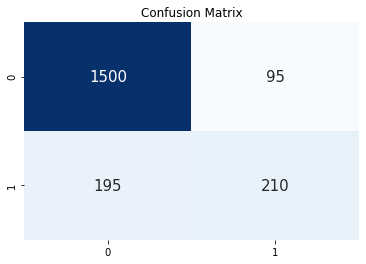

In [76]:
# Predicting Output and Confusion Matrix

y_pred2 = ann2.predict(X_test)
y_pred2 = (y_pred2 > 0.5)

from sklearn.metrics import confusion_matrix
df_cm2 = confusion_matrix(y_test, y_pred2)

plt.title("Confusion Matrix")
ax = sns.heatmap(df_cm2,
                 annot=True,
                 cmap="Blues",
                 fmt="d",
                 cbar=False, 
                 annot_kws={"size": 15})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

> `CASE 3` - More neurons in hidden layer

In [77]:
#Initialize Neural Network
ann3 = tf.keras.models.Sequential()

#Addition of layers
ann3.add(tf.keras.layers.Dense(units = 8, activation = 'relu'))
ann3.add(tf.keras.layers.Dense(units = 8, activation = 'relu'))
ann3.add(tf.keras.layers.Dense(units = 8, activation = 'relu'))
ann3.add(tf.keras.layers.Dense(units = 8, activation = 'relu'))

#Addition of Outpur layer
ann3.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

#Compiling ANN
ann3.compile(optimizer = 'adam', loss = 'binary_crossentropy' , metrics = ['accuracy'])

#Fitting training data
ann3.fit(X_train, y_train, batch_size = 100, epochs = 100)

Epoch 1/100
8000/8000 [==============================] - 1s 99us/sample - loss: 0.6433 - acc: 0.7054
Epoch 2/100
8000/8000 [==============================] - 0s 26us/sample - loss: 0.5379 - acc: 0.7960
Epoch 3/100
8000/8000 [==============================] - 0s 28us/sample - loss: 0.4971 - acc: 0.7960
Epoch 4/100
8000/8000 [==============================] - 0s 27us/sample - loss: 0.4744 - acc: 0.7960
Epoch 5/100
8000/8000 [==============================] - 0s 26us/sample - loss: 0.4588 - acc: 0.7969
Epoch 6/100
8000/8000 [==============================] - 0s 26us/sample - loss: 0.4480 - acc: 0.8010
Epoch 7/100
8000/8000 [==============================] - 0s 27us/sample - loss: 0.4391 - acc: 0.8051
Epoch 8/100
8000/8000 [==============================] - 0s 29us/sample - loss: 0.4327 - acc: 0.8091
Epoch 9/100
8000/8000 [==============================] - 0s 29us/sample - loss: 0.4243 - acc: 0.8149
Epoch 10/100
8000/8000 [==============================] - 0s 28us/sample - loss: 0.4157 - a

(2.0, 0.0)

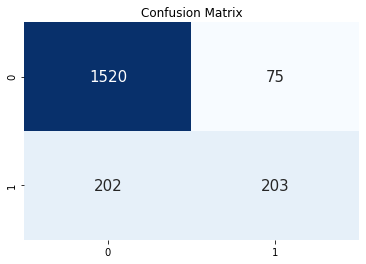

In [78]:
# Predicting Output and Confusion Matrix

y_pred3 = ann3.predict(X_test)
y_pred3 = (y_pred3 > 0.5)

from sklearn.metrics import confusion_matrix
df_cm3 = confusion_matrix(y_test, y_pred3)

plt.title("Confusion Matrix")
ax = sns.heatmap(df_cm3,
                 annot=True,
                 cmap="Blues",
                 fmt="d",
                 cbar=False, 
                 annot_kws={"size": 15})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### STEP 9 - CONCLUSION

- Using Data Science Life Cyle process we could build our Artificial Neural Network model.


- Accuracy achevied was around 86% when it was trianed on 10,000 observation over 100 epochs.


- We tried various combination like increasing the hidden layer, increasing hidden layer with batches, increasing nos of neurons in hidden layer so that we could observe some change in the accuracy, but accuracy was still 86%but there was some sought of reduction in the Type 1 and Type 2 error.


- We could see Type 2 error was reduced from 200 to 190 when we had more hidden layers. Also Type 1 error was reduced from 82 to 75 when we added more neurons in hidden layer.